# <center> Итоги модуля *Визуализация*

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

In [9]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
churn_data.drop('RowNumber', inplace=True, axis=1)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [43]:
churn_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


## <center> Задание 9.1 
### Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [31]:
churn_exited = churn_data.groupby('Exited')['Exited'].count() # отсортируем стобец по значениям и посчитаем их количество
churn_exited.index = ['Лояльные', 'Ушедшие'] # зададим название индексов сортированных значений
# создадим график при помоши метода pie
fig =px.pie(
    data_frame=churn_exited,
    names=churn_exited.index,       
    values=churn_exited.values,
    title='Соотношение ушедших клиентов к лояльным',
    width=500,
    height=500
)
fig.show()

### *Исходя из графика можно сделать вывод о том, что в данном банке больше 79% клиентов являются лояльными.*

## <center> Задание 9.2
### Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

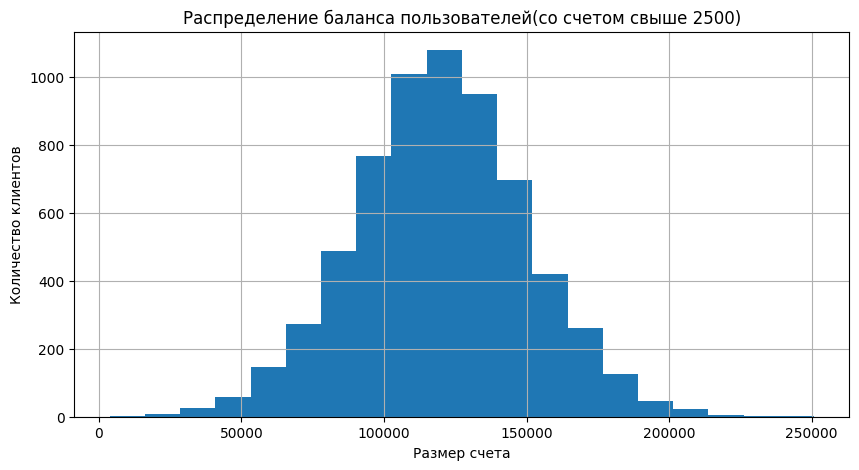

In [51]:
balances = churn_data[churn_data['Balance'] > 2500]
fig, axes = plt.subplots(figsize=(10, 5))
axes.hist(
    x= balances['Balance'],
    bins=20
);
axes.set_title('Распределение баланса пользователей(со счетом свыше 2500)')
axes.set_xlabel('Размер счета')
axes.set_ylabel('Количество клиентов')
axes.grid()

### Из представленного графика можно сделать вывод, о том какой самый большой счет клиента(около 250000), также что сумма на счетах до 125тыс. сначало увеличивается, затем количество клиентов уменьшается что позволяет сделать вывод что не многие клиенты могут позволить хранить большую сумму на своих счетах, больше 1000 клиентов хранит на своих счетах около 125000 